## Plots
### Author: Xiang Li



In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')

# Plot Part

In [3]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

# Venn 2, 3 and 4

In [21]:
def Generate_Venn_Diagram(RAW_PATH, Out_Path, Merge_Column):
    from matplotlib_venn import venn2
    
    DIR_CHECK_CREATE(RAW_PATH)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')

        ### Union A and B, use indicator to differentiate them.
        union_A_B=df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer', indicator=True)

        intersection_A_B=union_A_B[union_A_B['_merge']=='both']
        only_A=union_A_B[union_A_B['_merge']=='left_only']
        only_B=union_A_B[union_A_B['_merge']=='right_only']

        #Output
        intersection_A_B.to_csv(OUT_PATH+'/Intersection_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_A.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[0][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_B.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        union_A_B.to_csv(OUT_PATH+'/Union_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')


    out = venn2(subsets=(len(only_A[Merge_Column]), len(only_B[Merge_Column]), len(intersection_A_B[Merge_Column])),
          set_labels=(INPUT_LIST[0][:-4], INPUT_LIST[1][:-4] ) )
    for text in out.subset_labels:
        text.set_fontsize(18)
    plt.show()
    
def Generate_Venn3_Diagram(RAW_PATH, Out_Path, Merge_Column):
    from matplotlib_venn import venn3, venn3_circles
    RAW_PATH=RAW_PATH
    DIR_CHECK_CREATE(RAW_PATH)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C = df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C),3), dtype=int)


        for j in range(len(union_A_B_C)):
            if (union_A_B_C.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConC})

        intersection_metrix = intersection_metrix*1


        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        #intersection_metrix
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC

        A_solo = len(df_A) - ABC - AC - AB 
        B_solo = len(df_B) - ABC - BC - AB 
        C_solo = len(df_C) - ABC - AC - BC
        print (A_solo, B_solo, AB, C_solo, AC, BC, ABC)
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,8))
    out = venn3(subsets = (A_solo, B_solo, AB, C_solo, AC, BC, ABC), set_labels = (str(len(df_A))+"_"+ConA, str(len(df_B))+"_"+ConB,
                                                                                   str(len(df_C))+"_"+ConC))
    for text in out.subset_labels:
        if text == None:
            continue
        text.set_fontsize(18)
        
def Generate_Venn4_Diagram(RAW_PATH, Out_Path, Merge_Column):
    import venn
    DIR_CHECK_CREATE(RAW_PATH)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 4:
        print ('Input Three, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]
        PATH_D = RAW_PATH + '/' +INPUT_LIST[3]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]
        ConD=INPUT_LIST[3][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')
        df_D = pd.read_csv(PATH_D,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C_D = df_D.loc[:,[Merge_Column]].merge( df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C_D), 4), dtype=int)


        for j in range(len(union_A_B_C_D)):
            if (union_A_B_C_D.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_D.loc[:,'gene_id']):
                intersection_metrix[j,3] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C_D['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C_D['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C_D['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConC}),union_A_B_C_D['gene_id'].isin(df_D['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConD})

        intersection_metrix = intersection_metrix*1

        
        
        intersection_metrix ['ABCD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['ABD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,3]
        intersection_metrix ['ACD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]        
        intersection_metrix ['BCD'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,3]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BD'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,3]
        intersection_metrix ['CD'] = intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        
        
        #intersection_metrix
        ABCD = len(intersection_metrix[intersection_metrix['ABCD']==4])
        
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])-ABCD
        ABD = len(intersection_metrix[intersection_metrix['ABD']==3])-ABCD
        ACD = len(intersection_metrix[intersection_metrix['ACD']==3])-ABCD
        BCD = len(intersection_metrix[intersection_metrix['BCD']==3])-ABCD
        
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC-ABD-ABCD
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC-ACD-ABCD
        AD = len(intersection_metrix[intersection_metrix['AD']==2])   -ABD-ACD-ABCD
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC-BCD-ABCD
        BD = len(intersection_metrix[(intersection_metrix['BD']==2)]) -ABD-BCD-ABCD
        CD = len(intersection_metrix[(intersection_metrix['CD']==2)]) -ACD-BCD-ABCD

        A_solo = len(df_A) - ABCD - ABC - ABD - ACD - AB - AC - AD
        B_solo = len(df_B) - ABCD - ABC - ABD - BCD - AB - BC - BD
        C_solo = len(df_C) - ABCD - ABC - ACD - BCD - AC - BC - CD
        D_solo = len(df_D) - ABCD - ABD - ACD - BCD - AD - BD - CD
        print (A_solo, B_solo, AB, C_solo, AC, BC, ABC)
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    labels = venn.get_labels([{0},{0},{0},{0}],  fill=['number'])
    labels['1111'] = ABCD
    labels['1110'] = ABC
    labels['1101'] = ABD
    labels['1011'] = ACD
    labels['0111'] = BCD
    labels['1100'] = AB
    labels['1010'] = AC
    labels['1001'] = AD
    labels['0110'] = BC
    labels['0101'] = BD
    labels['0011'] = CD
    labels['1000'] = A_solo
    labels['0001'] = D_solo
    labels['0010'] = C_solo
    labels['0100'] = B_solo

    fig, ax = venn.venn4(labels, names=[ConA, ConB, ConC, ConD], figsize=(9,8))
    fig.show()
    
    #        Atlantic  Indian
    #whales     8        2
    #sharks     1        5
    #oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])

    
    import scipy.stats as stats
    oddsratio, pvalue = stats.fisher_exact([[AC,AD],[BC,BD]])
    ax.set_title('Pvalue = '+ str(round(pvalue,5)), fontsize=28)

# Bed Format Venn

In [ ]:
def Generate_Venn_Diagram(Raw_Path, Out_Path):
    from pybedtools import BedTool
    from matplotlib_venn import venn2
    
    INPUT_LIST = [f for f in os.listdir(Raw_Path) if not f.startswith('.')]  ## Exclude hidden file, start with .
    print INPUT_LIST
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = Raw_Path + '/' +INPUT_LIST[0]
        PATH_B = Raw_Path + '/' +INPUT_LIST[1]

    df1 = BedTool(PATH_A)
    df2 = BedTool(PATH_B)

    intersect_df = df1.intersect(df2, u=True)

    out = venn2(subsets=(len(df1-df2), len(df2-df1), len(df2+df1)),
              set_labels=(len(df1), len(df2)))
    for text in out.subset_labels:
        text.set_fontsize(14)

    (df1-df2).saveas(str(len(df1-df2))+'_specific_'+INPUT_LIST[0][0:-4]+'.bed')
    (df2-df1).saveas(str(len(df2-df1))+'_specific_'+INPUT_LIST[1][0:-4]+'.bed')
    (df1+df2).saveas(str(len(df1+df2))+'_overlap_'+INPUT_LIST[1][0:-4]+'.bed')
    plt.title(str(len(df2+df1))+'('+ str( len(df1+df2)) +')' )
    plt.show()
    return 0

def Generate_Venn3_Diagram(Raw_Path, Out_Path, num_order):

    from pybedtools import BedTool
    import pybedtools
    from matplotlib_venn import venn3

    INPUT_LIST = [f for f in os.listdir(Raw_Path) if not f.startswith('.')]  ## Exclude hidden file, start with .
    print INPUT_LIST
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        if (len(num_order) != 3 ):
            Num_Order=[0,1,2]
        else:
            Num_Order=num_order

    PATH_1 = Raw_Path + '/' +INPUT_LIST[Num_Order[0]]
    ConA=INPUT_LIST[Num_Order[0]][:-4]

    PATH_2 = Raw_Path + '/' +INPUT_LIST[Num_Order[1]]
    ConB=INPUT_LIST[Num_Order[1]][:-4]

    PATH_3 = Raw_Path + '/' +INPUT_LIST[Num_Order[2]]
    ConC=INPUT_LIST[Num_Order[2]][:-4]

    df1 = BedTool(PATH_1)
    df2 = BedTool(PATH_2)
    df3 = BedTool(PATH_3)

    merge_123 = df1.cat(df2.cat(df3))
    merge_123_with_counts=merge_123.intersect(df1,c=True).intersect(df2,c=True).intersect(df3,c=True)

    df_merge = pd.read_table(merge_123_with_counts.fn,sep="\t", header=None,
        names= ['#Chr', 'TSS','TES', ConA, ConB, ConC])


    A_Sum=df_merge[ConA].sum()
    B_Sum=df_merge[ConB].sum()
    C_Sum=df_merge[ConC].sum()

    df_merge.loc[df_merge.index[df_merge[ConA]>1], [ConA]]=1
    df_merge.loc[df_merge.index[df_merge[ConB]>1], [ConB]]=1
    df_merge.loc[df_merge.index[df_merge[ConC]>1], [ConC]]=1

    df_merge['ABC']=df_merge[ConA]+df_merge[ConB]+df_merge[ConC]
    df_merge['AB']=df_merge[ConA]+df_merge[ConB]
    df_merge['BC']=df_merge[ConB]+df_merge[ConC]
    df_merge['AC']=df_merge[ConA]+df_merge[ConC]

    if (len(df_merge['ABC'].value_counts()) < 3):  ## 1,2,3
        print "At least Two sets have no overlap" 
        center=0
    else:
        center=df_merge['ABC'].value_counts()[3]

    if (len(df_merge['AB'].value_counts()) < 3):   ## 0,1,2
        AB_com=0
    else:
        AB_com=df_merge['AB'].value_counts()[2]-center

    if (len(df_merge['AC'].value_counts()) < 3):  ## 0,1,2
        AC_com=0
    else:
        AC_com=df_merge['AC'].value_counts()[2]-center

    if (len(df_merge['BC'].value_counts()) < 3):  ## 0,1,2
        BC_com=0
    else:
        BC_com=df_merge['BC'].value_counts()[2]-center

    A_solo=A_Sum-AB_com-AC_com-center
    B_solo=B_Sum-AB_com-BC_com-center
    C_solo=C_Sum-AC_com-BC_com-center

    plt.figure(figsize=(5,5))

    out = venn3(subsets = (A_solo, B_solo, AB_com, C_solo, AC_com, BC_com, center), \
    set_labels = (len(df1),len(df2),len(df3)))#, linestyle='dashesd', linewidth=1)

    for text in out.subset_labels:
        #print text
        if (text != None):
            text.set_fontsize(14)
    plt.title('Venn3 of '+str(len(df3))+' & '+ str( len(df2)) +' & ' + str( len(df1)),fontsize=14 )
    plt.show()
    return 0


In [22]:
def feature_associated_genes(gene_annotation_path, feature_path):
    gene_annotation_Bed=BedTool(gene_annotation_path).sort()
    features_Bed=BedTool(feature_path).sort()
    
    #########################################################################################
    ## pre step remove the one overlap with DEGs promoter
    #feature_DEGs_Promoter=BedTool('313_259_DEGs_Promoter_Regions_ext_1kb.bed')
    #features_Bed = features_Bed.intersect(feature_DEGs_Promoter, u=True)
    #########################################################################################
    ### first association by overlap
    features_associated_genes = features_Bed.intersect(gene_annotation_Bed, wa=True, wb=True)
    df_all_group = pd.read_table(features_associated_genes.fn, header=None)
    ### Second associate rest features by cloest
    features_no_overlap = features_Bed.intersect(gene_annotation_Bed,v=True)
    if (features_no_overlap.count()!=0):
        features_closest_associated=features_no_overlap.closest(gene_annotation_Bed, t='all')
        df_features_closest_associated=pd.read_table(features_closest_associated.fn, header=None)
        df_all_group = df_all_group.append(df_features_closest_associated)
    
    return df_all_group



(313, 9)

In [13]:
#

Raw_Path='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/Genelist_Mechanism_1_2_3_4/'
df_genelist=pd.read_csv(Raw_Path+'572_DEGs_with_Four_Machanism.bed',sep="\t").rename(columns={'id':'gene_id'})
df_genelist=df_genelist[df_genelist['expression']=='Down']

df_genelist[df_genelist['Tcf1_Binding']!='No'].iloc[:,3].to_csv(Raw_Path+'venn3/Down_DEGs_Tcf1_Binding_Promoter.genelist', index=None,header=True)
df_genelist[df_genelist['HiC']!='0'].iloc[:,3].to_csv(Raw_Path+'venn3/Down_DEGs_Loops.genelist', index=None,header=True)
df_genelist[df_genelist['DNase']!='0'].iloc[:,3].to_csv(Raw_Path+'venn3/Down_DEGs_Chromatin.genelist', index=None,header=True)
df_genelist[df_genelist['SE']!='0'].iloc[:,3].to_csv(Raw_Path+'venn3/Down_DEGs_SuperEnhancer.genelist', index=None,header=True)


In [16]:
#
Raw_Path='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/Genelist_Mechanism_1_2_3_4/venn3/Up_Genelist'
df_genelist=pd.read_csv('/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/Genelist_Mechanism_1_2_3_4/572_DEGs_with_Four_Machanism.bed',sep="\t").rename(columns={'id':'gene_id'})
df_genelist=df_genelist[df_genelist['expression']=='Up']

df_genelist[df_genelist['Tcf1_Binding']!='No'].iloc[:,3].to_csv(Raw_Path+'Up_DEGs_Tcf1_Binding_Promoter.genelist', index=None,header=True)
df_genelist[df_genelist['HiC']!='0'].iloc[:,3].to_csv(Raw_Path+'Up_DEGs_Loops.genelist', index=None,header=True)
df_genelist[df_genelist['DNase']!='0'].iloc[:,3].to_csv(Raw_Path+'Up_DEGs_Chromatin.genelist', index=None,header=True)
df_genelist[df_genelist['SE']!='0'].iloc[:,3].to_csv(Raw_Path+'Up_DEGs_SuperEnhancer.genelist', index=None,header=True)


Dir Exists
Dir Exists
Input File: 
['Down_DEGs_Loops.genelist', 'Down_DEGs_Tcf1_Binding_Promoter.genelist', 'Down_DEGs_Chromatin.genelist', 'Down_DEGs_SuperEnhancer.genelist']
Input Three, Continue.
(11, 51, 14, 23, 4, 22, 5)


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


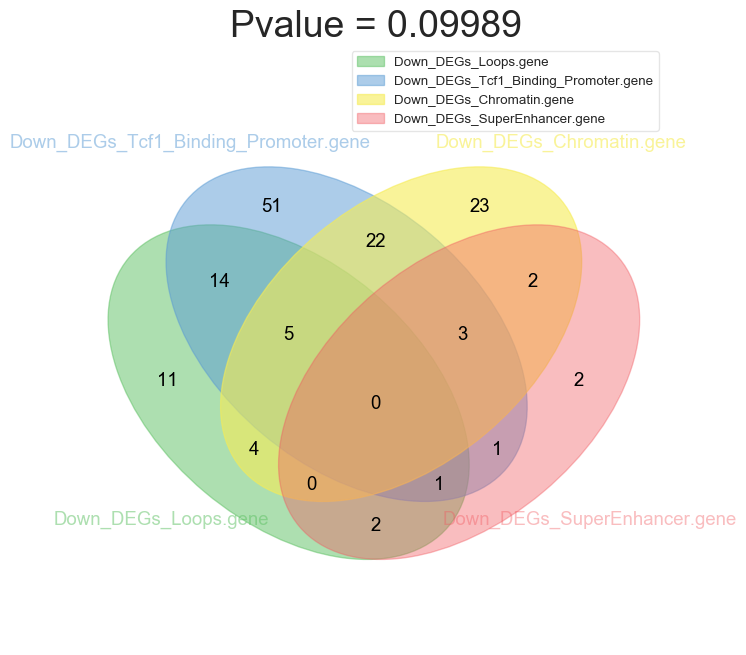

In [23]:
Raw_Path='/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/Genelist_Mechanism_1_2_3_4/'

Generate_Venn4_Diagram(Raw_Path+'venn3/Down_Genelist', Raw_Path+'output', 'gene_id')

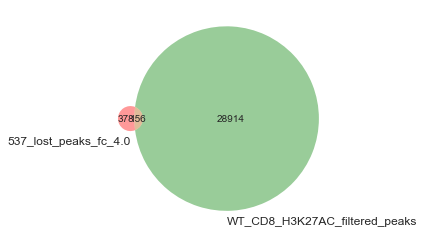

<BedTool(263_genelist_intersection_WT_CD8_H3K27AC_filtered_peaks_537_lost_peaks_fc_4.0.bed)>

In [41]:
from pybedtools import BedTool
from matplotlib_venn import venn2

Folder_Name='/Diff_Binding_Events_Dnaseq/Venn2'
RAW_PATH = os.getcwd() +  Folder_Name
OUT_PATH = os.getcwd() + Folder_Name
#
os.listdir(RAW_PATH)
NAME1 = '/537_lost_peaks_fc_4.0.bed'
NAME2 = '/WT_CD8_H3K27AC_filtered_peaks.bed'
NAME3 = '/gene_Genebody_Up_EX_50k_unique.bed'

df1 = BedTool(RAW_PATH+ NAME1)
df2 = BedTool(RAW_PATH+ NAME2)
df3 = BedTool(RAW_PATH+ NAME3)


intersect_df = df1.intersect(df2, u=True)
len(intersect_df)
len(df1-df2)
len(df2-df1)

out = venn2(subsets=(len(df1-df2), len(df2-df1), len(df2+df1)),
          set_labels=(NAME1[1:-4], NAME2[1:-4]))
for text in out.subset_labels:
    text.set_fontsize(10)
plt.show()


#(df1+df2).saveas(str(len(df1+df2))+'_intersection_'+NAME1[1:-4]+'_'+NAME2[1:-4]+'.bed')
#(df2+df1).saveas(str(len(df2+df1))+'_intersection_'+NAME2[1:-4]+'_'+NAME1[1:-4]+'.bed')
(df3+(df2+df1)).saveas(str(len(df3+(df2+df1)))+'_genelist_intersection_'+NAME2[1:-4]+'_'+NAME1[1:-4]+'.bed')

In [37]:
len((df3+(df2+df1))+(df3+(df1+df2)))


263

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


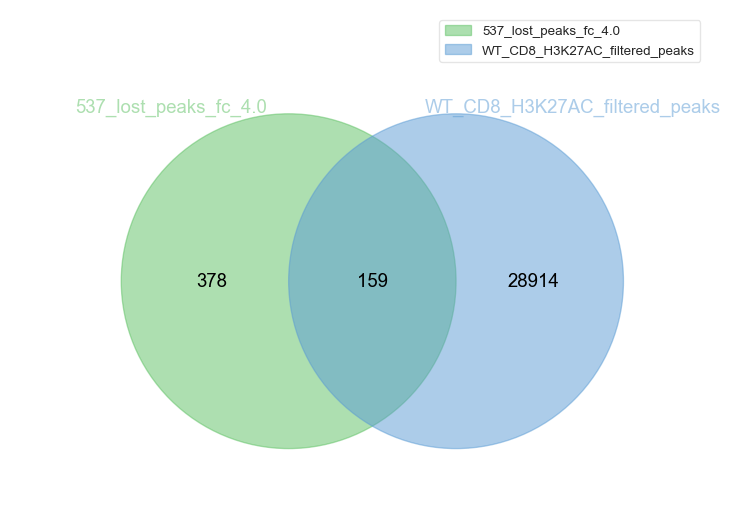

In [14]:
import venn
labels = venn.get_labels([{0},{0}],  fill=['number'])
labels['10']=len(df1-df2)
labels['01']=len(df2-df1)
labels['11']=len(df1+df2)
fig, ax = venn.venn2(labels, names=[NAME1[1:-4], NAME2[1:-4]])
fig.show()


In [ ]:
Folder_Name='Down'
RAW_PATH=os.getcwd() + '/genelist/Venn/' + Folder_Name
OUT_PATH=os.getcwd() + '/genelist/Venn/Results_' + Folder_Name

Generate_Venn3_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

Dir Exists
Dir Exists
Input File: 
['up_DKO_0h_vs_WT_0h.bed', 'Up_DKO_CD8_0h_over_WT_CD8_0h_ZZ.bed']
Input Two, Continue.


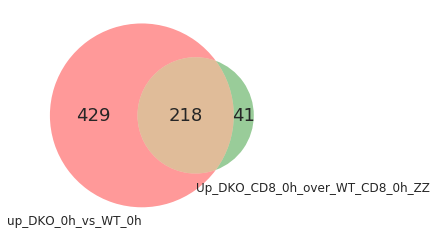

In [14]:
Folder_Name='Up'
RAW_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/' + Folder_Name
OUT_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/Results_' + Folder_Name

Generate_Venn_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

# heatmap

(5623, 29)

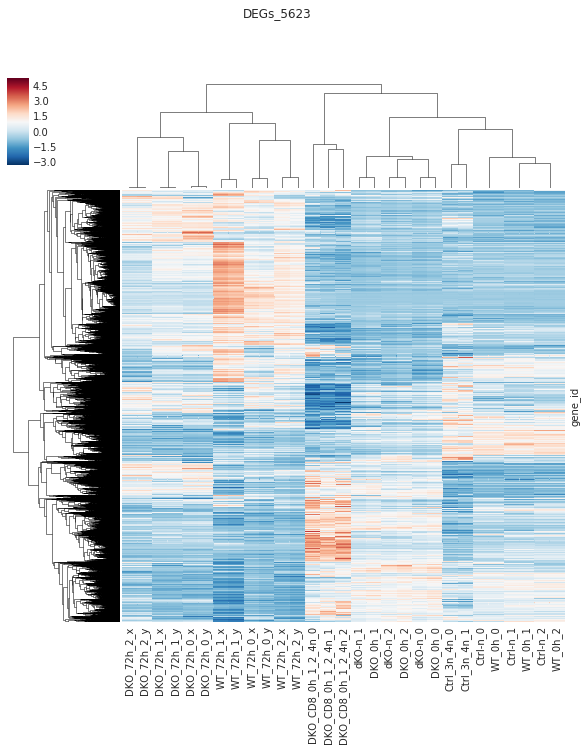

In [15]:
### Drop all zeros rows for plot
Heatmap_Df = df_ALL_DEGs.loc[(df_ALL_DEGs!=0).any(axis=1)]

Heatmap_Name='DEGs_'+str(len(Heatmap_Df.index))
#### Very Important

#Heatmap_Df=FPKM_df.fillna(0)

fig_1 = sns.clustermap(Heatmap_Df,  yticklabels=False, z_score=0, col_cluster=True, cmap='RdBu_r' )
fig_1.savefig(Heatmap_Name+'.png')
fig_1.fig.suptitle(Heatmap_Name)
Heatmap_Df.shape

# PCA



## Input a DataFrame then plot.

In [16]:
# PCA
df_2 = df_ALL_DEGs #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = [x.encode('ascii', 'ignore') for x in df_2.index]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#### In here we set targets as the name of columns, which means our purpose is to compare \
#### the relationship between different columns.
targets= [x.encode('ascii', 'ignore') for x in df_2.columns]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

################################################################################

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf

,principal component 1,principal component 2
Ctrl_3n_4n_0,-9.611481,-60.351322
Ctrl_3n_4n_1,-8.146160,-57.424568
DKO_CD8_0h_1_2_4n_0,-59.608932,67.053024
DKO_CD8_0h_1_2_4n_1,-64.376341,54.908210
DKO_CD8_0h_1_2_4n_2,-72.795119,55.085117
Ctrl-n_0,-27.296778,-46.508727
Ctrl-n_1,-31.645623,-41.528416
Ctrl-n_2,-32.462886,-41.049033
dKO-n_2,-46.108241,7.843257
dKO-n_0,-47.306553,11.530231


(5623, 29)

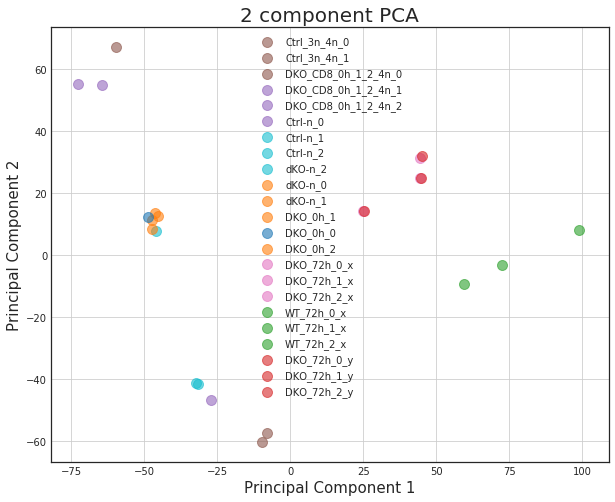

In [17]:
### PLOT

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['C5','C5','C5',
          'C4','C4','C4',
          'C9','C9','C9',
          'C1','C1','C1',
          'C0','C1', 
          'C6','C6','C6',
          'C2','C2','C2',
          'C3','C3','C3']

for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100, c=color, alpha=0.6)
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape

## Violin Plot

In [43]:
os.listdir(data_path)

['RPKM_All_genes_and_union_peaks',
 '.ipynb_checkpoints',
 'RPKM_Stim_WT_Up_Tcf1-Dependent_Genes',
 'Only_R1_TEST',
 'version.beta',
 'Expression_Data',
 'Differential Events Calling by Customized Protocol .ipynb',
 'Diff_Binding_Events_Dnaseq',
 'Plot_PCA_Heatmap_Violin_venn_scattering.ipynb',
 'MACS2_Diff_results',
 'DNaseq_Histone_mark']

In [101]:
#pwd
import re
PATH_FOLDER=os.getcwd()
data_path = PATH_FOLDER+'/Expression_Data'
os.listdir(data_path)

NAME_1 ='/263_genelist_intersection_WT_CD8_H3K27AC_filtered_peaks_537_lost_peaks_fc_4.0.bed'
#NAME_2 ='/Only_genelist_537_lost_peaks_fc_4.0.bed'

df1= pd.read_csv(data_path+NAME_1, sep='\t', header=None)
df1 = df1.rename(columns={0:'#chr', 1:'start', 2:'end', 3:'gene_id'})
#df2= pd.read_csv(data_path+NAME_2, sep='\t')
df_expression = pd.read_csv(data_path+'/WT_72h_vs_WT_0h_Expression.txt', sep='\t')


df_expression['fold_change'] = df_expression['WT_72h_']/df_expression['WT_0h_']
df1 = df1.merge(df_expression[['gene_id','WT_72h_', 'WT_0h_','fold_change']], on='gene_id',how='inner').replace([np.inf, -np.inf], np.nan).dropna(axis=0)
#df2 = df2.merge(df_expression[['gene_id','fold_change']], on='gene_id',how='inner').replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [102]:
df1[['gene_id','WT_72h_', 'WT_0h_', 'fold_change']].describe()

,WT_72h_,WT_0h_,fold_change
count,243.000000,243.000000,243.000000
mean,78.438657,77.216872,1.165710
std,367.886694,332.272093,1.078176
min,0.000000,0.010481,0.000000
25%,3.408085,3.764615,0.707251
50%,14.025900,15.322900,0.929538
75%,36.121050,41.591100,1.261130
max,4522.170000,4151.980000,9.465248


Text(0.5,0,'243_genelist')

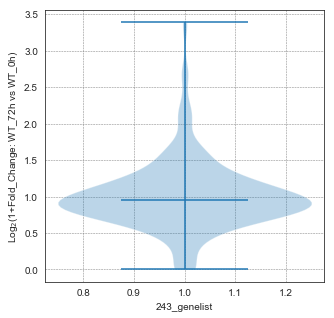

In [113]:
all_data = df1[['gene_id', 'fold_change']].set_index('gene_id')

#y_max, y_min = (max( [max(x)  for x in all_data ]), min( [min(x)  for x in all_data ]))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes.violinplot(np.log2(1+all_data['fold_change']), showmeans=False,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('Log$_2$(1+Fold_Change: WT_72h vs WT_0h)')

axes.set_xlabel( str(len(all_data))+'_genelist')
#axes.set_ylim(-0.5, 4)



In [108]:
all_data.describe()

,fold_change
count,243.000000
mean,1.165710
std,1.078176
min,0.000000
25%,0.707251
50%,0.929538
75%,1.261130
max,9.465248


Text(0.5,1,'Expression : 263 genes')

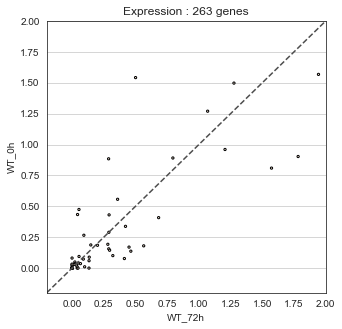

In [76]:
df_ALL_DEGs =df1[['gene_id','WT_72h_', 'WT_0h_']]
range_limit=2

from scipy.stats import gaussian_kde
        # Calculate the point density
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=False, sharey=False)
xy = np.vstack([df_ALL_DEGs['WT_72h_'], df_ALL_DEGs['WT_0h_']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_ALL_DEGs['WT_72h_'], df_ALL_DEGs['WT_0h_'], alpha=1.0,s=5, c=z,edgecolor='k')


ax.yaxis.grid(True)
ax.set_ylim(-0.1*range_limit,range_limit)
ax.set_xlim(-0.1*range_limit,range_limit)
ax.set_xlabel('WT_72h')
ax.set_ylabel('WT_0h')
ax.plot([-0.1*range_limit,range_limit], [-0.1*range_limit, range_limit], ls="--", c=".3")
ax.set_title('Expression '+': '+str(len(df_ALL_DEGs))+' genes')

#fig.subplots_adjust(right=0.8)


In [39]:
df1.describe()

,fold_change
count,296.000000
mean,2.673115
std,7.757429
min,0.000000
25%,0.719814
50%,1.017716
75%,1.517589
max,76.238787


P_value is: 1.8e-02


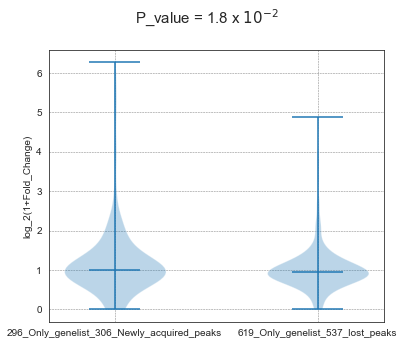

In [37]:
all_data=[np.log2(1+df1['fold_change']), np.log2(1+ df2['fold_change'])]

y_max, y_min = (max( [max(x)  for x in all_data ]), min( [min(x)  for x in all_data ]))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes.violinplot( all_data,showmeans=False,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('log_2(1+Fold_Change)')


plt.setp( axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=[ str(len(all_data[0]))+'_'+NAME_1[1:-11], str(len(all_data[1]))+'_'+NAME_2[1:-11]])



from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu(all_data[0], all_data[1], alternative=None )[0], 
                stats.mannwhitneyu(all_data[0], all_data[1], alternative='two-sided')[1])
#print "U= %d p = %.1e" % (MWU, pvalue)

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
        print('P_value is: %.1e' % pvalue )
        plt.text( 1.1, (y_max+1.0) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        plt.text( 1.1, (y_max+1.0) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)

In [ ]:
df0_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_a = df0_a.set_index('gene_id').dropna(axis=0, how='any')
df0_a = df0_a.loc[ (df0_a['RPKM'] > 0 ) ]
df0_a = df0_a.rename(columns={'RPKM':'RPKM_WT_Only_Foxp3'})

df0_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_b = df0_b.set_index('gene_id').dropna(axis=0, how='any')
df0_b = df0_b.loc[ (df0_b['RPKM'] > 0 ) ]
df0_b = df0_b.rename(columns={'RPKM':'RPKM_KO_Only_Foxp3'})

###################################################################################################################
df1_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_a = df1_a.set_index('gene_id').dropna(axis=0, how='any')
df1_a = df1_a.loc[ (df1_a['RPKM'] > 0 ) ]
df1_a = df1_a.rename(columns={'RPKM':'RPKM_WT_Intersection'})

df1_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_b = df1_b.set_index('gene_id').dropna(axis=0, how='any')
df1_b = df1_b.loc[ (df1_b['RPKM'] > 0 ) ]
df1_b = df1_b.rename(columns={'RPKM':'RPKM_KO_Intersection'})

###################################################################################################################
df2_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_a = df2_a.set_index('gene_id').dropna(axis=0, how='any')
df2_a = df2_a.loc[ (df2_a['RPKM'] > 0 ) ]
df2_a = df2_a.rename(columns={'RPKM':'RPKM_WT_Only_Treg'})

df2_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_b = df2_b.set_index('gene_id').dropna(axis=0, how='any')
df2_b = df2_b.loc[ (df2_b['RPKM'] > 0 ) ]
df2_b = df2_b.rename(columns={'RPKM':'RPKM_KO_Only_Treg'})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

axes[0,0].violinplot(  (np.log10(df0_a.iloc[:,0])),showmeans=False,showmedians=True )
axes[0,0].set_title('gene_list_WT_Only_FoxP3_'+str(len(df0_a)))

axes[1,0].violinplot( ( np.log10(df0_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,0].set_title('gene_list_KO_Only_FoxP3_'+str(len(df0_b)))



axes[0,1].violinplot( ( np.log10(df1_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,1].set_title('gene_list_WT_Intersection_'+str(len(df1_a)))

axes[1,1].violinplot( ( np.log10(df1_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,1].set_title('gene_list_KO_Intersection_'+str(len(df1_b)))



axes[0,2].violinplot( ( np.log10(df2_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,2].set_title('gene_list_WT_Only_Treg_'+str(len(df2_a)))

axes[1,2].violinplot( ( np.log10(df2_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,2].set_title('gene_list_KO_Only_Treg_'+str(len(df2_b)))



for i in range(2):
    for j in range(3):
        ax=axes[i,j]
        ax.yaxis.grid(True)
        #ax.set_xticks([y + 1 for y in range(max(df1))])
        ax.set_ylim(-0.5,2)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('log10(RPKM)')

fig.savefig('gene_list_WT_KO.png') 

# Scattering Plot + Heatmap

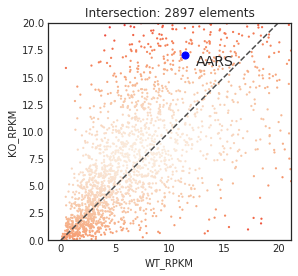

In [30]:
df_gene_Intersection_WT = df_high_gene['Naive_CD4_Rest']
df_gene_Intersection_KO = df_high_gene['Naive_Rest_CD8']


from scipy.stats import gaussian_kde
        # Calculate the point density
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 4)) #, sharex=False, sharey=True)

range_limit=20
xy = np.vstack([df_gene_Intersection_WT.values, df_gene_Intersection_KO.values])
z = gaussian_kde(xy)(xy)

axis.axis('equal')
cax_1 = axis.scatter(df_gene_Intersection_WT.values, df_gene_Intersection_KO.values, alpha=1.0,s=5,c=z, label='HIGH_IRI',edgecolor='')

###  highlight a point
highlight_index='AARS'
axis.scatter(df_gene_Intersection_WT[df_gene_Intersection_WT.index == highlight_index],
            df_gene_Intersection_KO[df_gene_Intersection_KO.index == highlight_index],
            alpha=1.0,s=50,color='blue', label=highlight_index,edgecolor='blue')
axis.text(df_gene_Intersection_WT[df_gene_Intersection_WT.index == highlight_index]+range_limit/20,
            df_gene_Intersection_KO[df_gene_Intersection_KO.index == highlight_index]-range_limit/20, highlight_index, fontsize=14)
###

axis.set_title('Intersection: '+ str(len(df_gene_Intersection_WT)) + ' elements')
axis.plot([0,range_limit], [0, range_limit], ls="--", c=".3")



axis.set_ylim(-0,range_limit)
axis.set_xlim(-0,range_limit)
axis.set_xlabel('WT_RPKM')
axis.set_ylabel('KO_RPKM')

fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7]) # A 4-length sequence of [left, bottom, width, height] quantities.
#fig.colorbar(cax=cbar_ax)



    